# polynomial regression

In [1]:
from matplotlib import rc
# rc('font', **{'family':'sans-serif', 'sans-serif':['Helvetica']})
# rc('text', usetex=True)

In [1]:
from __future__ import division, print_function, unicode_literals
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
np.random.seed(4)

from sklearn import datasets, linear_model
from matplotlib.backends.backend_pdf import PdfPages

In [4]:
N = 30
N_test = 20
X = np.random.rand(N, 1)*5 # tạo ma trận ngẫu nhiên Nx1 
y = 3*(X-2) * (X-3) * (X-4) + 10*np.random.randn(N, 1) # tạo ma trận ngẫu nhiên Nx1 theo standard normal
# print(X)
# print(y)

In [4]:
X_test = (np.random.rand(N_test, 1) - 1/8) * 10
y_test = 3*(X_test-2) * (X_test-3) * (X_test-4) + 10*np.random.randn(N_test, 1)
# print(X_test)
# print(y_test)

In [5]:
def buildX(X, d=2):
    res = np.ones((X.shape[0], 1))
    for i in range(1, d+1):
        res = np.concatenate((res, X**i), axis=1)
    return res

In [32]:
def myfit(X, y, d):
    Xbar = buildX(X, d)
    # fit_intercept=False for no calculating the bias
    regr = linear_model.LinearRegression(fit_intercept=False)
    regr.fit(Xbar, y)

    w = regr.coef_

    # display result
    # w_0 = w[0][0]
    # w_1 = w[0][1]
    x0 = np.linspace(-2, 7, 200, endpoint=True)
    y0 = np.zeros_like(x0)
    ytrue = 5*(x0-2) * (x0-3) * (x0-4)

    for i in range(d+1):
        y0 += w[0][i]*x0**i

    # draw the fitting line
    l1 = plt.scatter(X.T, y.T, c='r', marker='o', s=40,label = 'Training samples', edgecolors = 'k') # data
    # print(X_test.shape, y_test.shape)
    l2 = plt.scatter(X_test.T, y_test.T, c='y', marker='s', s = 40, label = 'Test samples', edgecolors = 'k') # data

    l3, = plt.plot(x0, y0, 'b', linewidth=2, label = "Predicted model") # the fitting line
    l4, = plt.plot(x0, ytrue, 'g--', linewidth=2, label = "True model") # the fitting line
    plt.xticks([],[])
    plt.yticks([],[])
    
    if d<3:
        str1 = 'Under fitting'
    elif d>4:
        str1 = 'Over fitting'
    else:
        str1 = 'Good fit'
    
    str0 = 'Degree = ' + str(d) + ': ' + str1
    plt.title(str0)
    plt.axis([-4, 10, np.amin(y_test) - 100, np.amax(y) + 100])
    plt.legend(handles = [l1, l2, l3, l4],fontsize = 14, loc = "best")

    fn = 'linreg_' + str(d) + '.png'

    plt.xlabel('$x$', fontsize = 20)
    plt.ylabel('$y$', fontsize = 20)
    plt.savefig(fn, bbox_inches='tight', dpi = 600)
    # filename = 'poly' + str(d) + '.pdf'
    # with PdfPages(filename) as pdf:
    #     pdf.savefig(bbox_inches='tight')

    plt.show()
    print(w)


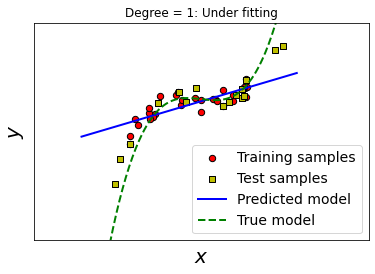

[[-41.90206792  12.66196586]]


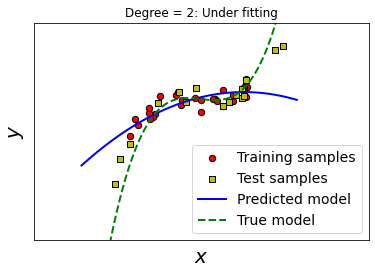

[[-52.79321911  27.33320281  -2.85491906]]


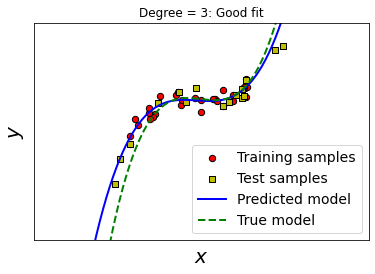

[[-70.86022078  78.7687132  -28.99387406   3.4286372 ]]


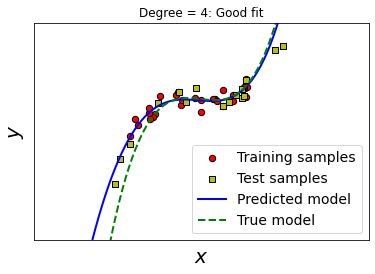

[[-70.11099235  74.66197229 -24.91080481   2.11241837   0.13285956]]


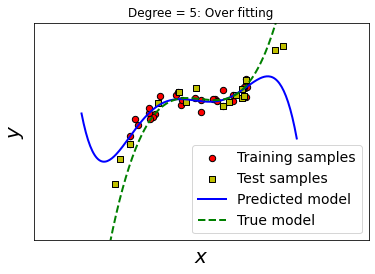

[[-68.57483456  59.26170717   0.1044099  -12.13646198   3.44964181
   -0.27022708]]


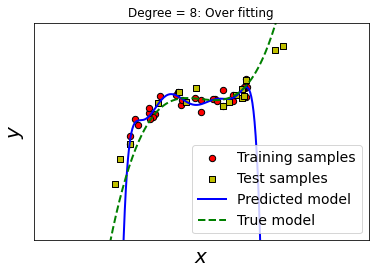

[[-8.31452004e+01  3.47714187e+02 -1.03309551e+03  1.48372383e+03
  -1.08580923e+03  4.36091506e+02 -9.77083149e+01  1.14715264e+01
  -5.50276444e-01]]


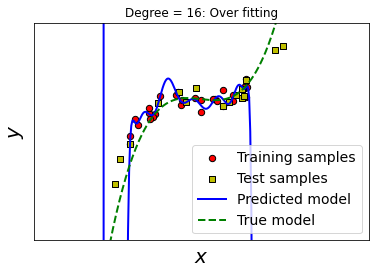

[[-1.13972143e+02  1.48509531e+03 -1.06959953e+04  3.60292183e+04
  -6.18737139e+04  5.04161834e+04 -1.05532643e+03 -3.90923449e+04
   4.21730732e+04 -2.45089752e+04  9.16646978e+03 -2.30845624e+03
   3.91275970e+02 -4.30326183e+01  2.80078360e+00 -8.49953122e-02
   3.07303406e-04]]


In [33]:
myfit(X, y, 1)
myfit(X, y, 2)
myfit(X, y, 3)
myfit(X, y, 4)
myfit(X, y, 5)
myfit(X, y, 8)
myfit(X, y, 16)

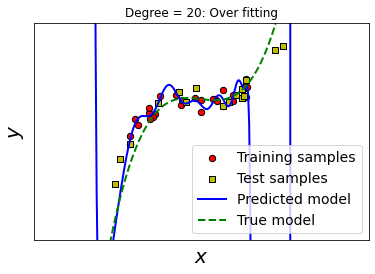

[[-7.83369587e+01  1.85960054e+02 -1.64412533e+02 -7.85595625e+01
   4.51092394e+01  8.36211325e+01  3.98842719e+01 -2.61154206e+01
  -4.83496713e+01 -1.07928672e+01  3.03189241e+01  1.35759362e+01
  -2.16550965e+01  2.25764884e+00  6.35786688e+00 -4.17772140e+00
   1.31100403e+00 -2.42581206e-01  2.70725257e-02 -1.69393933e-03
   4.58120469e-05]]


In [35]:
myfit(X, y, 20)